<a href="https://colab.research.google.com/github/KimDukJung/20240229ppt/blob/main/nltk_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install BeautifulSoup4

In [2]:
pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 4.4 MB/s eta 0:00:00


In [4]:
import FinanceDataReader as fdr

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
samsung = fdr.DataReader('005930', '2020')
samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [7]:
seq_data = (samsung[['Open']]).to_numpy()

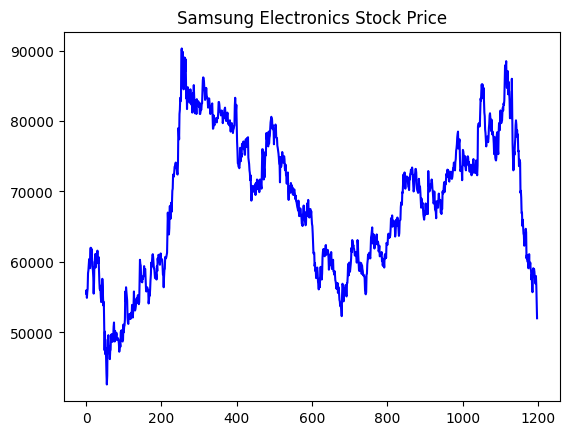

In [11]:
plt.plot(seq_data, color='blue')
plt.title("Samsung Electronics Stock Price")
plt.xlabel("days")
plt.xlabel("")
plt.show()

In [12]:
pip install nltk

In [16]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize("Hello World!, This is a dog.")
words = [word for word in tokens if word.isalpha()]
print(words)
# ['Hello', 'World', 'This', 'is', 'a', 'dog'

['Hello', 'World', 'This', 'is', 'a', 'dog']


In [19]:
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
print(stopwords.words('english')[:20])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
text = "This is a dog."
print(word_tokenize(text))

['This', 'is', 'a', 'dog', '.']


In [21]:
from nltk.tokenize import sent_tokenize
text = "Hello World!, This is a dog."
print(sent_tokenize(text))

['Hello World!, This is a dog.']


In [22]:
from tensorflow.keras.preprocessing.text import *
print(text_to_word_sequence("This is a dog."))

['this', 'is', 'a', 'dog']


In [23]:
import numpy as np
from keras.utils import to_categorical

# 우리가 변환하고 싶은 텍스트
text = ["cat", "dog", "cat", "bird"]

# 단어 집합
total_pets = ["cat", "dog", "turtle", "fish", "bird"]
print("text=", text)

text= ['cat', 'dog', 'cat', 'bird']


In [24]:
# 변환에 사용되는 딕셔너리를 만든다.
mapping = {}
for x in range(len(total_pets)):
  mapping[total_pets[x]] = x	#“cat"->0, "dog"->1, ...
print(mapping)

# 단어들을 순차적인 정수 인덱스로 만든다.
for x in range(len(text)):
  text[x] = mapping[text[x]]

print("text=", text)

# 순차적인 정수 인덱스를 원-핫 인코딩으로 만든다.
one_hot_encode = to_categorical(text)
print("text=", one_hot_encode)



{'cat': 0, 'dog': 1, 'turtle': 2, 'fish': 3, 'bird': 4}
text= [0, 1, 0, 4]
text= [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer()
text = """Deep learning is part of a broader family of machine learning methods
	based on artificial neural networks with representation learning."""

t.fit_on_texts([text])
print("단어집합 : ", t.word_index)


단어집합 :  {'learning': 1, 'of': 2, 'deep': 3, 'is': 4, 'part': 5, 'a': 6, 'broader': 7, 'family': 8, 'machine': 9, 'methods': 10, 'based': 11, 'on': 12, 'artificial': 13, 'neural': 14, 'networks': 15, 'with': 16, 'representation': 17}


In [26]:
seq = t.texts_to_sequences([text])[0]
print(text,"->", seq)


Deep learning is part of a broader family of machine learning methods
	based on artificial neural networks with representation learning. -> [3, 1, 4, 5, 2, 6, 7, 8, 2, 9, 1, 10, 11, 12, 13, 14, 15, 16, 17, 1]


In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences([[7, 8, 9], [1, 2, 3, 4, 5], [7]], maxlen=3, padding='pre')
print(X)


[[7 8 9]
 [3 4 5]
 [0 0 7]]


In [28]:
import numpy as np
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

# 입력 형태: (batch_size, input_length)=(32, 3)
# 출력 형태: (None, 3, 4)
model = Sequential()
model.add(Embedding(100, 4, input_length=3))

input_array = np.random.randint(100, size=(32, 3))
model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
print(output_array.shape)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
(32, 3, 4)


In [29]:
import numpy as np
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

docs = [	'additional income',
		'best price',
		'big bucks',
		'cash bonus',
		'earn extra cash',
		'spring savings certificate',
		'valero gas marketing',
		'all domestic employees',
		'nominations for oct',
		'confirmation from spinner']


In [30]:

labels = np.array([1,1,1,1,1,0,0,0,0,0])

vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)



[[6, 37], [11, 39], [29, 33], [32, 16], [41, 13, 32], [9, 20, 9], [17, 27, 28], [49, 6, 21], [45, 19, 40], [1, 17, 22]]


In [31]:
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 6 37  0  0]
 [11 39  0  0]
 [29 33  0  0]
 [32 16  0  0]
 [41 13 32  0]
 [ 9 20  9  0]
 [17 27 28  0]
 [49  6 21  0]
 [45 19 40  0]
 [ 1 17 22  0]]


In [32]:
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(padded_docs, labels, epochs=50, verbose=0)

loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('정확도=', accuracy)

정확도= 1.0


In [33]:
test_doc = ['big income']
encoded_docs = [one_hot(d, vocab_size) for d in test_doc]
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

print(model.predict(padded_docs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
[[0.5965438]]


In [35]:
import numpy as np
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text_data="""Soft as the voice of an angel\n
Breathing a lesson unhead\n
Hope with a gentle persuasion\n
Whispers her comforting word\n
Wait till the darkness is over\n
Wait till the tempest is done\n
Hope for sunshine tomorrow\n
After the shower
"""

In [36]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_data])
encoded = tokenizer.texts_to_sequences([text_data])[0]
print(encoded)

[7, 8, 1, 9, 10, 11, 12, 13, 2, 14, 15, 3, 16, 2, 17, 18, 19, 20, 21, 22, 4, 5, 1, 23, 6, 24, 4, 5, 1, 25, 6, 26, 3, 27, 28, 29, 30, 1, 31]


In [37]:
print(tokenizer.word_index)
vocab_size = len(tokenizer.word_index) + 1
print('어휘 크기: %d' % vocab_size)

{'the': 1, 'a': 2, 'hope': 3, 'wait': 4, 'till': 5, 'is': 6, 'soft': 7, 'as': 8, 'voice': 9, 'of': 10, 'an': 11, 'angel': 12, 'breathing': 13, 'lesson': 14, 'unhead': 15, 'with': 16, 'gentle': 17, 'persuasion': 18, 'whispers': 19, 'her': 20, 'comforting': 21, 'word': 22, 'darkness': 23, 'over': 24, 'tempest': 25, 'done': 26, 'for': 27, 'sunshine': 28, 'tomorrow': 29, 'after': 30, 'shower': 31}
어휘 크기: 32


In [38]:
sequences = list()
for i in range(1, len(encoded)):
	sequence = encoded[i-1:i+1]
	sequences.append(sequence)
print(sequences)
print('총 시퀀스 개수: %d' % len(sequences))

[[7, 8], [8, 1], [1, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 2], [2, 14], [14, 15], [15, 3], [3, 16], [16, 2], [2, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 4], [4, 5], [5, 1], [1, 23], [23, 6], [6, 24], [24, 4], [4, 5], [5, 1], [1, 25], [25, 6], [6, 26], [26, 3], [3, 27], [27, 28], [28, 29], [29, 30], [30, 1], [1, 31]]
총 시퀀스 개수: 38


In [39]:
sequences = np.array(sequences)
X, y = sequences[:,0],sequences[:,1]
print("X=", X)
print("y=", y)

X= [ 7  8  1  9 10 11 12 13  2 14 15  3 16  2 17 18 19 20 21 22  4  5  1 23
  6 24  4  5  1 25  6 26  3 27 28 29 30  1]
y= [ 8  1  9 10 11 12 13  2 14 15  3 16  2 17 18 19 20 21 22  4  5  1 23  6
 24  4  5  1 25  6 26  3 27 28 29 30  1 31]


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LSTM, Reshape

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(Reshape((1, 10)))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))

In [46]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',	metrics=['accuracy'])

model.fit(X, y, epochs=500, verbose=2)

Epoch 1/500
2/2 - 2s - 1s/step - accuracy: 0.0263 - loss: 3.4659
Epoch 2/500
2/2 - 0s - 16ms/step - accuracy: 0.0789 - loss: 3.4647
Epoch 3/500
2/2 - 0s - 30ms/step - accuracy: 0.0789 - loss: 3.4635
Epoch 4/500
2/2 - 0s - 20ms/step - accuracy: 0.1316 - loss: 3.4626
Epoch 5/500
2/2 - 0s - 16ms/step - accuracy: 0.1316 - loss: 3.4616
Epoch 6/500
2/2 - 0s - 16ms/step - accuracy: 0.1316 - loss: 3.4606
Epoch 7/500
2/2 - 0s - 29ms/step - accuracy: 0.1316 - loss: 3.4597
Epoch 8/500
2/2 - 0s - 17ms/step - accuracy: 0.1316 - loss: 3.4587
Epoch 9/500
2/2 - 0s - 17ms/step - accuracy: 0.1316 - loss: 3.4579
Epoch 10/500
2/2 - 0s - 29ms/step - accuracy: 0.1316 - loss: 3.4569
Epoch 11/500
2/2 - 0s - 29ms/step - accuracy: 0.1316 - loss: 3.4559
Epoch 12/500
2/2 - 0s - 28ms/step - accuracy: 0.1053 - loss: 3.4549
Epoch 13/500
2/2 - 0s - 16ms/step - accuracy: 0.1053 - loss: 3.4539
Epoch 14/500
2/2 - 0s - 16ms/step - accuracy: 0.1053 - loss: 3.4529
Epoch 15/500
2/2 - 0s - 29ms/step - accuracy: 0.1053 - loss

In [47]:
# 테스트 단어를 정수 인코딩한다.
test_text = 'Wait'
encoded = tokenizer.texts_to_sequences([test_text])[0]
encoded = np.array(encoded)

# 신경망의 예측값을 출력해본다.
onehot_output = model.predict(encoded)
print('onehot_output=', onehot_output)

# 가장 높은 출력을 내는 유닛을 찾는다.
output = np.argmax(onehot_output)
print('output=', output)

# 출력층의 유닛 번호를 단어로 바꾼다.
print(test_text, "=>", end=" ")
for word, index in tokenizer.word_index.items():
	if index == output:
		print(word)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
onehot_output= [[2.2474667e-05 1.1312323e-02 1.1021288e-04 9.1032003e-04 1.6449523e-04
  9.5816731e-01 5.6568976e-03 2.0303687e-05 1.7501829e-03 7.7932168e-07
  1.8100966e-04 7.9900092e-06 2.4521512e-05 3.5188457e-06 7.9366095e-05
  9.4820345e-05 3.8910218e-07 1.4609790e-04 2.6309335e-06 4.0175678e-06
  1.9916693e-05 5.1592173e-07 1.7810387e-05 5.5817327e-07 4.9645911e-05
  5.4424368e-07 3.9717066e-05 7.8925819e-07 1.9471178e-02 1.5532535e-03
  1.8545279e-04 9.1996856e-07]]
output= 5
Wait => till


In [48]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

In [49]:
imdb = keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

print(x_train[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [50]:
# 단어 ->정수 인덱스 딕셔너리
word_to_index = imdb.get_word_index()

# 처음 몇 개의 인덱스는 특수 용도로 사용된다.
word_to_index = {k:(v+3) for k,v in word_to_index.items()}
word_to_index["<PAD>"] = 0		# 문장을 채우는 기호
word_to_index["<START>"] = 1		# 시작을 표시
word_to_index["<UNK>"] = 2  		# 알려지지 않은 토큰
word_to_index["<UNUSED>"] = 3

index_to_word = dict([(value, key) for (key, value) in word_to_index.items()])

print(' '.join([index_to_word[index] for index in x_train[0]]))

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these c

In [51]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

vocab_size = 10000

In [52]:
model = Sequential()
model.add(Embedding(vocab_size, 64,
                    input_length=100))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
          batch_size=64, epochs=20, verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.6682 - loss: 0.5744 - val_accuracy: 0.8503 - val_loss: 0.3383
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9315 - loss: 0.1878 - val_accuracy: 0.8339 - val_loss: 0.4027
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9928 - loss: 0.0362 - val_accuracy: 0.8357 - val_loss: 0.5134
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9990 - loss: 0.0066 - val_accuracy: 0.8338 - val_loss: 0.5982
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.8381 - val_loss: 0.6519
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.8367 - val_loss: 0.6937
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9999 - loss: 9.2927e-04 - val_accuracy: 0.8368 - val_loss: 0.7331
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 1.0000 - loss: 4.1379e-

In [54]:
results = model.evaluate(x_test, y_test, verbose=2)
print(results)

782/782 - 4s - 5ms/step - accuracy: 0.8226 - loss: 1.2577
[1.2577333450317383, 0.8226400017738342]


In [56]:
review = """What can I say about this movie that was already said? It is my
favorite time travel sci-fi, adventure epic comedy in the 80's and I love
this movie to death! When I saw this movie I was thrown out by its theme. An
excellent sci-fi, adventure epic, I LOVE the 80s. It's simple the greatest time
travel movie ever happened in the history of world cinema. I love this movie to
death, I love, LOVE, love it!"""

In [57]:
import re
review = re.sub("[^0-9a-zA-Z ]", "", review).lower()

review_encoding = []
# 리뷰의 각 단어 대하여 반복한다.
for w in review.split():
		index = word_to_index.get(w, 2)	# 딕셔너리에 없으면 2 반환
		if index <= 10000:		# 단어의 개수는 10000이하
			review_encoding.append(index)
		else:
			review_encoding.append(word_to_index["UNK"])

# 2차원 리스트로 전달하여야 한다.
test_input = pad_sequences([review_encoding], maxlen = 100)
value = model.predict(test_input) # 예측
if(value > 0.5):
	print("긍정적인 리뷰입니다.")
else:
	print("부정적인 리뷰입니다.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
긍정적인 리뷰입니다.
